In [9]:
import os
import sys
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
import msgpack
from PIL import Image

In [10]:
data_path = Path("../data/raw/LDoGI/shards/")
data_path = data_path.resolve().absolute()
print(data_path)

/home/dkeni/Projects/Locus/locus-model/data/raw/LDoGI/shards


In [11]:
data_files = data_path.glob("*.msg")
first_file = next(data_files)

In [12]:
def format_size(size: int, uom: str="kb")-> str:
    assert uom in ["b", "kb", "Mb"]
    if uom == "b":
        return f"{size:.02f} b"
    elif uom == "kb":
        return f"{size / 1024:.02f} kb"
    elif uom == "Mb":
        return f"{size / 1024 / 1024:.02f} Mb"
    else:
        return f"{size:.02f} b"

In [13]:
msg_size = os.path.getsize(first_file)
print(format_size(msg_size, "Mb"))


691.42 Mb


In [14]:
# https://www.kaggle.com/code/jongkook90/inspect-the-dataset
# inspect the dataset code from kaggle
def get_image(record):
        return Image.open(BytesIO(record["image"]))

In [15]:
with open(first_file, "rb") as infile:
    gene = msgpack.Unpacker(infile, raw=False)
    print(type(gene))
    print(format_size(sys.getsizeof(gene)))
    print(gene)
    for i, record in enumerate(msgpack.Unpacker(infile, raw=False)):
        if i == 3:
            print(f'id={record["id"]}, lat={record["latitude"]}, lon={record["longitude"]}')
            image = get_image(record)
            lat = record["latitude"]
            lon = record["longitude"]
    else:
        print(f"Total of {i} images in the file")


print(type(gene))
print(format_size(sys.getsizeof(gene)))
print(gene)

<class 'msgpack._cmsgpack.Unpacker'>
40.27 kb
id=86/07/6337050880.jpg, lat=41.339055, lon=14.507789


Total of 29998 images in the file
<class 'msgpack._cmsgpack.Unpacker'>
40.27 kb


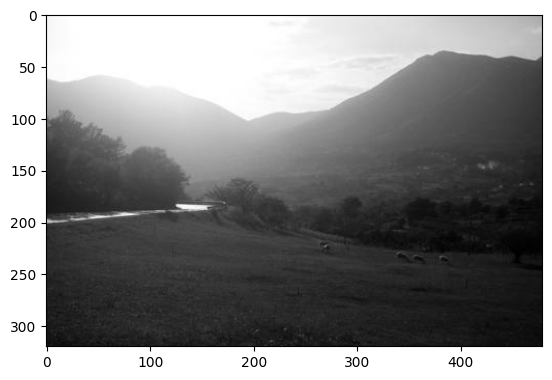

In [16]:
plt.imshow(image)
plt.show()